In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_trips = pd.read_csv("data/generated-marketplace-trips.csv")

In [3]:
df_trips.head(3)

,id,pilot,planet,passenger,trip_completed,trip_requested,trip_started,trip_ended,price,pilot_rating,passenger_rating
0,0,39,3,423,1,1.501065e+09,1.501065e+09,1.501068e+09,1489.0,5.0,5.0
1,1,3,6,53,1,1.514005e+09,1.514005e+09,1.514006e+09,377.0,2.0,5.0
2,2,36,2,458,1,1.505107e+09,1.505108e+09,1.505109e+09,569.0,4.0,5.0


In [4]:
df_planets = pd.read_csv("data/generated-marketplace-planets.csv")

In [5]:
df_planets.head(3)

,id,name
0,0,Alderaan
1,1,Chandrila
2,2,Corellia


In [6]:
df_trips["wait"] = df_trips["trip_started"] - df_trips["trip_requested"]
df_trips["duration"] = df_trips["trip_ended"] - df_trips["trip_started"]

df_trips["trip_requested_hour"] = pd.to_datetime(df_trips["trip_requested"], unit="s").dt.hour
df_trips["trip_requested_weekday"] = pd.to_datetime(df_trips["trip_requested"], unit="s").dt.weekday_name.str[:3]

df_trips["trip_started_hour"] = pd.to_datetime(df_trips["trip_started"], unit="s").dt.hour
df_trips["trip_started_weekday"] = pd.to_datetime(df_trips["trip_started"], unit="s").dt.weekday_name.str[:3]

In [7]:
df_trips.head(10)

,id,pilot,planet,passenger,trip_completed,trip_requested,trip_started,trip_ended,price,pilot_rating,passenger_rating,wait,duration,trip_requested_hour,trip_requested_weekday,trip_started_hour,trip_started_weekday
0,0,39,3,423,1,1.501065e+09,1.501065e+09,1.501068e+09,1489.0,5.0,5.0,349.0,3306.0,10,Wed,10,Wed
1,1,3,6,53,1,1.514005e+09,1.514005e+09,1.514006e+09,377.0,2.0,5.0,567.0,593.0,4,Sat,4,Sat
2,2,36,2,458,1,1.505107e+09,1.505108e+09,1.505109e+09,569.0,4.0,5.0,681.0,1232.0,5,Mon,5,Mon
3,3,48,6,306,1,1.513938e+09,1.513938e+09,1.513939e+09,673.0,4.0,5.0,424.0,1213.0,10,Fri,10,Fri
4,4,20,5,75,1,1.512226e+09,1.512227e+09,1.512230e+09,1536.0,4.0,5.0,468.0,3426.0,14,Sat,15,Sat
5,5,99,3,765,1,1.511929e+09,1.511929e+09,1.511932e+09,1031.0,5.0,4.0,568.0,2772.0,4,Wed,4,Wed
6,6,18,2,248,1,1.508912e+09,1.508912e+09,1.508914e+09,792.0,5.0,5.0,229.0,1974.0,6,Wed,6,Wed
7,7,48,6,500,1,1.498360e+09,1.498361e+09,1.498362e+09,562.0,5.0,5.0,678.0,1208.0,3,Sun,3,Sun
8,8,71,6,521,1,1.513964e+09,1.513965e+09,1.513965e+09,552.0,5.0,5.0,512.0,652.0,17,Fri,17,Fri
9,9,24,3,352,1,1.514597e+09,1.514597e+09,1.514599e+09,990.0,5.0,5.0,119.0,2636.0,1,Sat,1,Sat


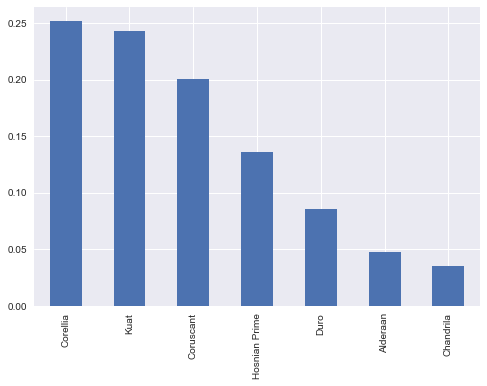

In [8]:
_ = (pd.merge(df_trips, df_planets, how="left", left_on="planet", right_on="id")["name"].value_counts() / len(df_trips)).plot.bar()

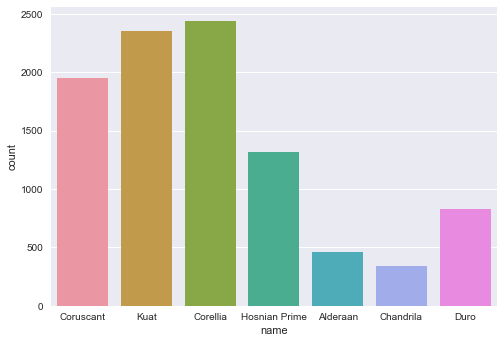

In [9]:
_ = sns.countplot(pd.merge(df_trips, df_planets, how="left", left_on="planet", right_on="id")["name"])

In [10]:
pd.DataFrame((pd.merge(df_trips, df_planets, how="left", left_on="planet", right_on="id")["name"].value_counts() / len(df_trips)).sort_index()).rename(columns={"name": "Frequency"})

,Frequency
Alderaan,0.047378
Chandrila,0.035405
Corellia,0.251548
Coruscant,0.200867
Duro,0.085776
Hosnian Prime,0.135838
Kuat,0.243187


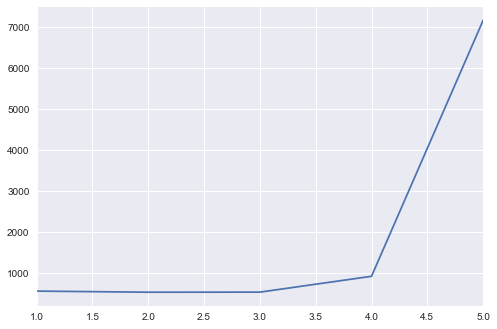

In [11]:
_ = df_trips["pilot_rating"].value_counts().sort_index().plot.line()

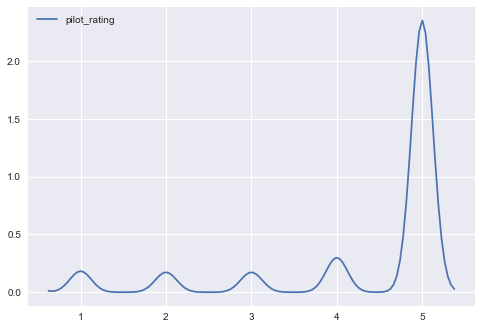

In [12]:
_ = sns.kdeplot(df_trips["pilot_rating"])

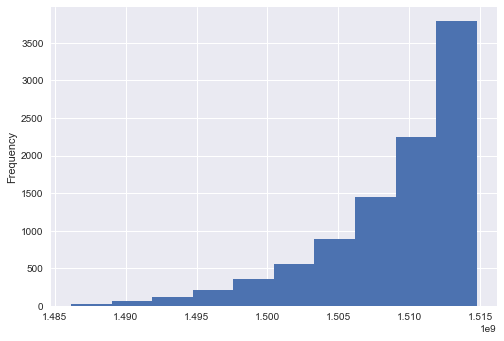

In [13]:
_ = df_trips["trip_requested"].plot.hist()

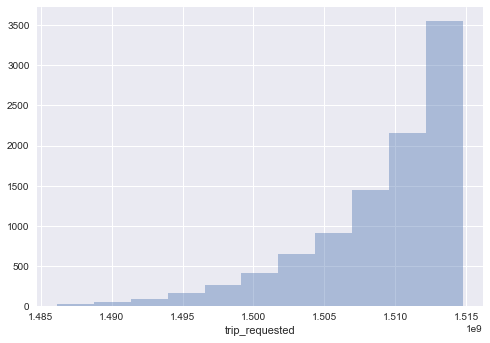

In [14]:
_ = sns.distplot(df_trips["trip_requested"], bins=11, kde=False)

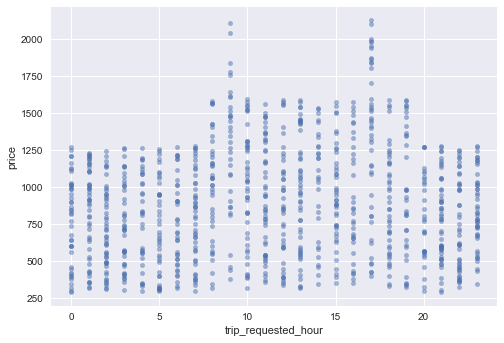

In [15]:
_ = df_trips.sample(1000).plot.scatter(x="trip_requested_hour", y="price", alpha=0.5)

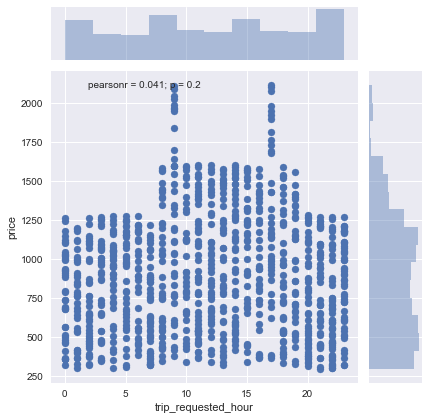

In [16]:
_ = sns.jointplot(x="trip_requested_hour", y="price", data=df_trips.sample(1000))

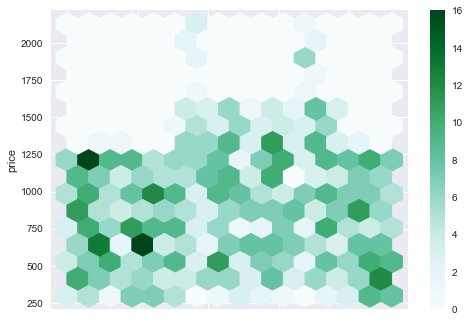

In [17]:
_ = df_trips.sample(1000).plot.hexbin(x="trip_requested_hour", y="price", gridsize=15)

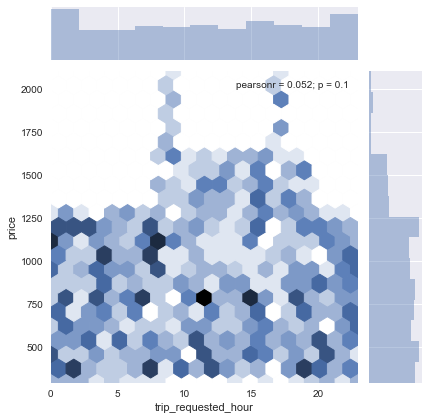

In [18]:
_ = sns.jointplot(x="trip_requested_hour", y="price", data=df_trips.sample(1000), kind="hex", gridsize=20)

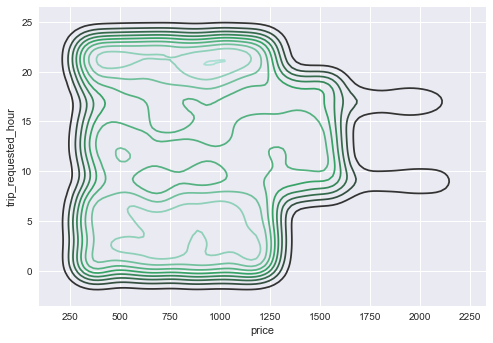

In [19]:
_ = sns.kdeplot(df_trips.price, df_trips.trip_requested_hour)

In [20]:
df_pilots = pd.read_csv("data/generated-marketplace-pilots.csv")

In [21]:
df_pilots.head(3)

,id,rating,banned,created
0,0,4.377809,1,1488210567
1,1,4.767935,0,1500441065
2,2,4.402110,0,1494907854


In [22]:
df_pilots["rating_1d"] = df_pilots["rating"].round(1)
df_pilots["rating_0d"] = df_pilots["rating"].round(0)

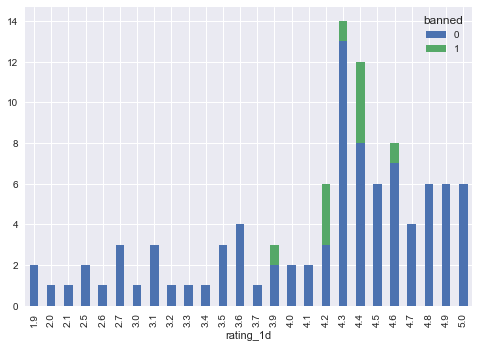

In [23]:
pd.crosstab(
    index=df_pilots["rating_1d"],
    columns=df_pilots["banned"]
).plot.bar(stacked=True)

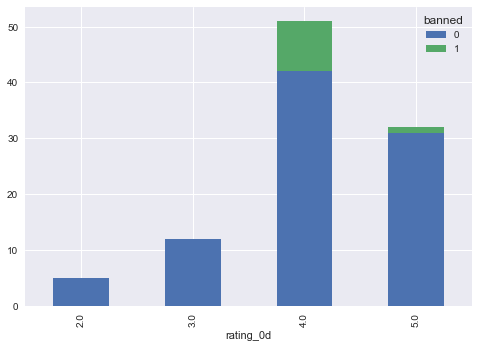

In [24]:
pd.crosstab(
    index=df_pilots["rating_0d"],
    columns=df_pilots["banned"]
).plot.bar(stacked=True)

In [25]:
df_trips.head(1)

,id,pilot,planet,passenger,trip_completed,trip_requested,trip_started,trip_ended,price,pilot_rating,passenger_rating,wait,duration,trip_requested_hour,trip_requested_weekday,trip_started_hour,trip_started_weekday
0,0,39,3,423,1,1.501065e+09,1.501065e+09,1.501068e+09,1489.0,5.0,5.0,349.0,3306.0,10,Wed,10,Wed


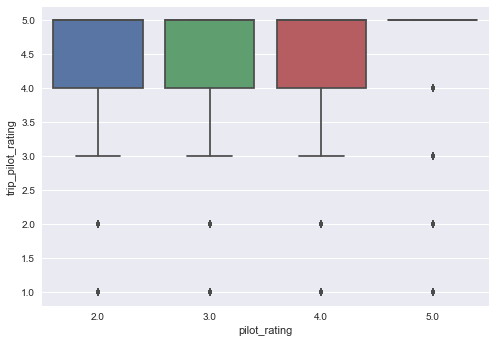

In [26]:
_ = sns.boxplot(
    x="pilot_rating",
    y="trip_pilot_rating",
    data=pd.merge(df_trips, df_pilots, how="left", left_on="pilot", right_on="id").rename(columns={
        "pilot_rating": "trip_pilot_rating",
        "rating_0d": "pilot_rating"
    })
)

In [27]:
df_passengers = pd.read_csv("data/generated-marketplace-passengers.csv")

In [28]:
df_user_ratings = pd.DataFrame({
    "rating": pd.concat([df_pilots["rating"], df_passengers["rating"]]).values
}, index=range(1100))
df_user_ratings["user_type"] = "passenger"
df_user_ratings.loc[:99, "user_type"] = "pilot"

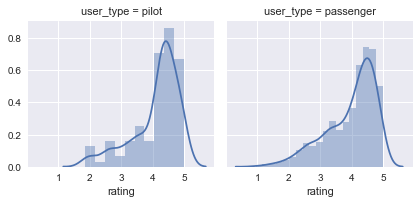

In [29]:
g = sns.FacetGrid(df_user_ratings, col="user_type")
_ = g.map(sns.distplot, "rating")

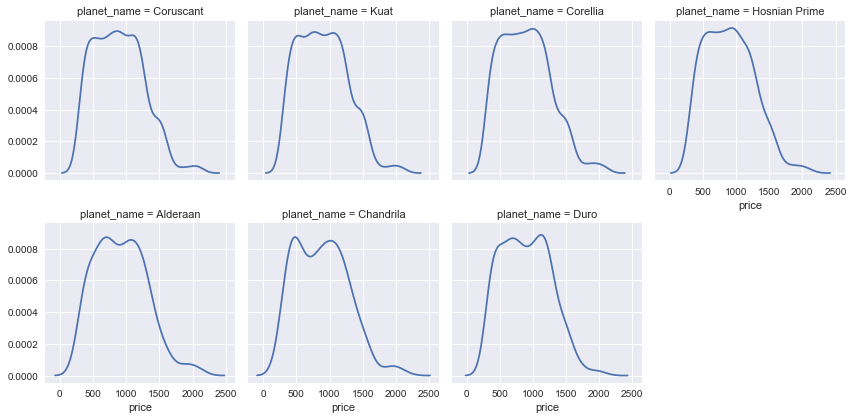

In [30]:
g = sns.FacetGrid(pd.merge(
    df_trips, df_planets, how="left", left_on="planet", right_on="id"
).rename(columns={"name": "planet_name"}), col="planet_name", col_wrap=4)
_ = g.map(sns.kdeplot, "price")

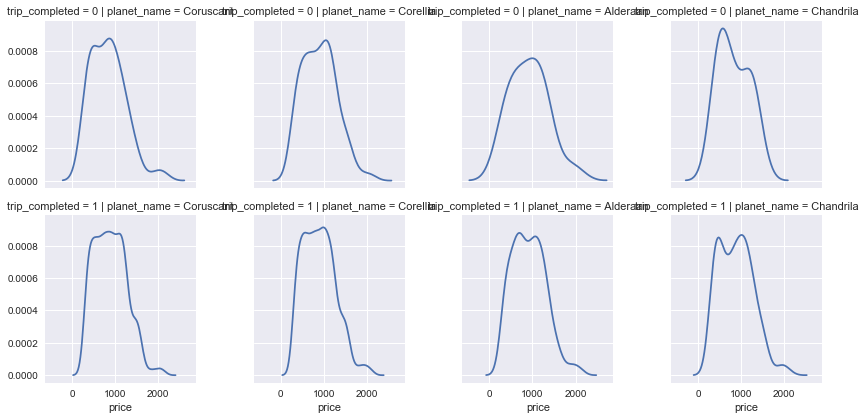

In [31]:
g = sns.FacetGrid(pd.merge(
    df_trips[df_trips.planet.isin(range(4))], df_planets, how="left", left_on="planet", right_on="id"
).rename(columns={"name": "planet_name"}), col="planet_name", row="trip_completed")
_ = g.map(sns.kdeplot, "price")

In [32]:
df_trips.head(1)

,id,pilot,planet,passenger,trip_completed,trip_requested,trip_started,trip_ended,price,pilot_rating,passenger_rating,wait,duration,trip_requested_hour,trip_requested_weekday,trip_started_hour,trip_started_weekday
0,0,39,3,423,1,1.501065e+09,1.501065e+09,1.501068e+09,1489.0,5.0,5.0,349.0,3306.0,10,Wed,10,Wed


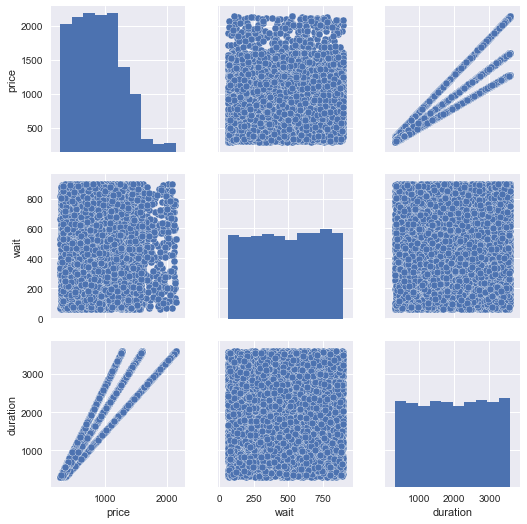

In [33]:
_ = sns.pairplot(df_trips[["price", "wait", "duration"]])

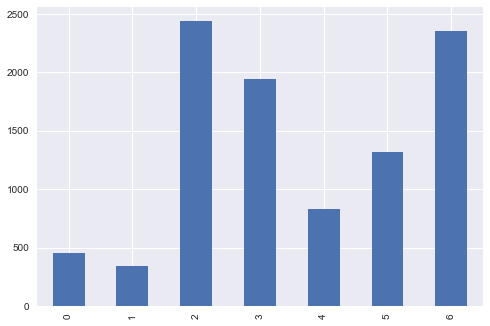

In [34]:
ax = df_trips.planet.value_counts().sort_index().plot.bar()

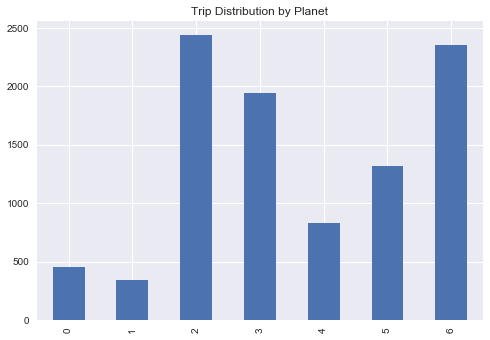

In [35]:
ax = df_trips.planet.value_counts().sort_index().plot.bar()
_ = ax.set_title("Trip Distribution by Planet")

In [36]:
import matplotlib.pyplot as plt

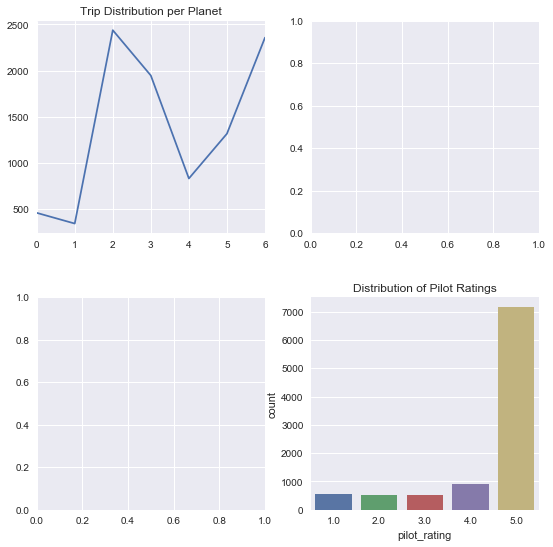

In [37]:
fig, axarr = plt.subplots(2, 2, figsize=(9, 9))

_ = df_trips.planet.value_counts().sort_index().plot.line(ax=axarr[0, 0])
_ = sns.countplot(df_trips.pilot_rating, ax=axarr[1, 1])

_ = axarr[0, 0].set_title("Trip Distribution per Planet")
_ = axarr[1, 1].set_title("Distribution of Pilot Ratings")

plt.subplots_adjust(hspace=.3)

In [38]:
type(fig)

matplotlib.figure.Figure

In [39]:
type(axarr)

numpy.ndarray

In [40]:
type(axarr[0, 0])

matplotlib.axes._subplots.AxesSubplot

In [41]:
df_trips.head(1)

,id,pilot,planet,passenger,trip_completed,trip_requested,trip_started,trip_ended,price,pilot_rating,passenger_rating,wait,duration,trip_requested_hour,trip_requested_weekday,trip_started_hour,trip_started_weekday
0,0,39,3,423,1,1.501065e+09,1.501065e+09,1.501068e+09,1489.0,5.0,5.0,349.0,3306.0,10,Wed,10,Wed


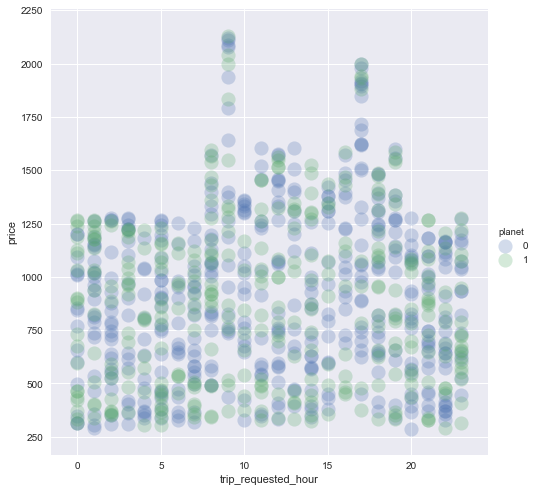

In [42]:
_ = sns.lmplot(
    x="trip_requested_hour", y="price", hue="planet",
    data=df_trips[df_trips.planet.isin(range(2))],
    fit_reg=False,
    size=7,
    scatter_kws={"s": 200, "alpha": 0.25}
)

Create a grouped box plot that shows the trip ratings of pilots vs passengers with 1, 2, 3, 4, and 5 star ratings.

In [43]:
# We want a df with three variables - trip_rating, user_rating, user_type 
# df_trips will have to be duplicated here because we want a different
# set of plots for pilots and passengers

df_all_ratings_pilots = pd.merge(
    df_trips, df_pilots, how="left", left_on="pilot", right_on="id"
)[["pilot_rating", "rating"]].rename(columns={
    "pilot_rating": "trip_rating",
    "rating": "user_rating"
})
df_all_ratings_pilots["user_type"] = "pilot"

df_all_ratings_passengers = pd.merge(
    df_trips, df_passengers, how="left", left_on="passenger", right_on="id"
)[["passenger_rating", "rating"]].rename(columns={
    "passenger_rating": "trip_rating",
    "rating": "user_rating"
})
df_all_ratings_passengers["user_type"] = "passenger"

df_all_ratings = pd.concat([df_all_ratings_pilots, df_all_ratings_passengers])
df_all_ratings.reset_index(drop=True, inplace=True)

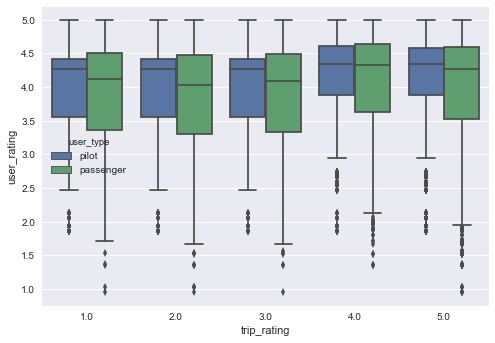

In [44]:
_ = sns.boxplot(x="trip_rating", y="user_rating", hue="user_type", data=df_all_ratings)

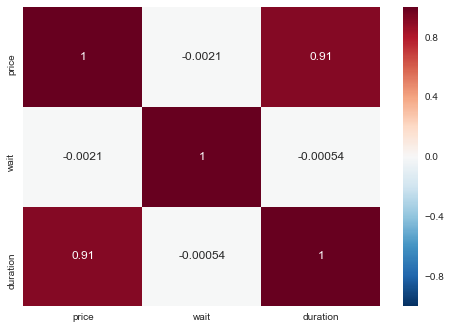

In [45]:
f = df_trips[["price", "wait", "duration"]].corr()
_ = sns.heatmap(f, annot=True)